# Visuliser l'évolution d'une image 2D avec python

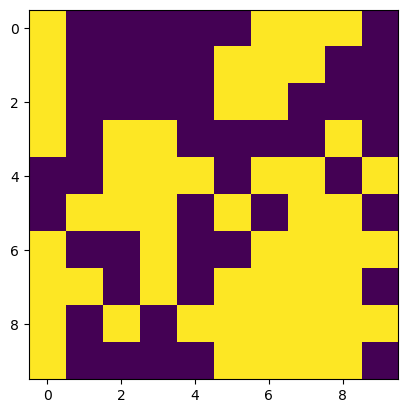

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Générer une image binaire aléatoire
spins = np.random.randint(2, size=(10,10))

# Représenter l'image 2D
plt.figure()
plt.imshow(spins)
plt.show()

In [3]:
# Générer une suite d'images en modifiant un spin à chaque itération
n_frames = 100
spins_init = np.random.randint(2, size=(10,10))
spins_traj = np.zeros((n_frames,10,10))
spins_traj[0] = spins_init
for i in range(1,n_frames):
    spins_traj[i] = spins_traj[i-1]
    spins_traj[i][int(i/10)][i%10] = (spins_traj[i][int(i/10)][i%10] + 1 ) % 2 # inverser le spin un par un


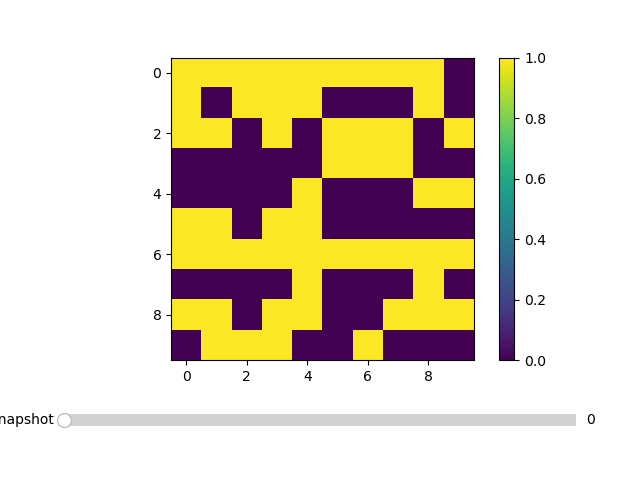

In [4]:
# Utilise les outils de widgets pour visualiser l'évolution des configurations

%matplotlib widget 
from matplotlib.widgets import Slider

# Charger toutes les configurations
snapshots = spins_traj
             
# Graphique initial
fig, ax = plt.subplots()
plt.subplots_adjust(left=0.1, bottom=0.25)
initial_snapshot = snapshots[0]
lattice_img = ax.imshow(initial_snapshot, cmap='viridis', interpolation='none')
plt.colorbar(lattice_img)

# Curseur
ax_slider = plt.axes([0.1, 0.1, 0.8, 0.05], facecolor='lightgoldenrodyellow')
snapshot_slider = Slider(ax_slider, 'Snapshot', 0, len(snapshots) - 1, valinit=0, valstep=1)

# Fonction qui met à jour l'affichage
def update(val):
    snapshot_idx = int(snapshot_slider.val)
    lattice_img.set_data(snapshots[snapshot_idx])
    plt.draw()

snapshot_slider.on_changed(update)

# Visualiser
plt.show()